# Assignment 2

In [1]:
# importing stuff for drawing plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

# Getting the data

In [14]:
# open the dataframes with the right separators
step_df = pd.read_csv("steps.csv", sep=";")
survey_df = pd.read_csv('survey.csv')

In [17]:
# merge the two dataframes and show the head of the dataframe
df = survey_df.merge(step_df, on = "id")
df.head(5)

,id,city,gender,age,hh_size,education_1,height,weight,20-6-2013,21-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculating mean steps

In [18]:
df["mean_steps"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1) #axis=1 calculates mean over columns
df.head()

,id,city,gender,age,hh_size,education_1,height,weight,20-6-2013,21-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


# Relation between numerical variables

Numerical Relationshop between height, weight and mean_steps

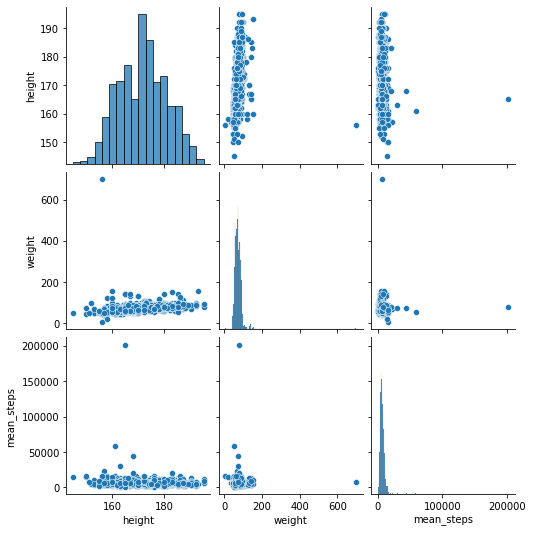

In [19]:
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

# Cleaning the data

C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


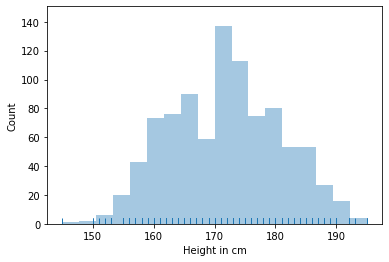

C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


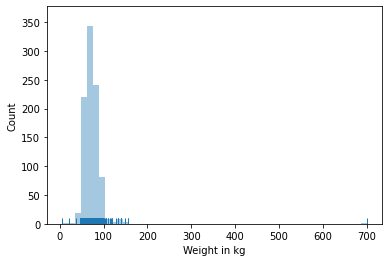

C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


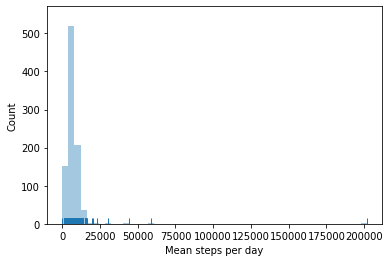

In [20]:
sns.distplot(df["height"], rug=True, kde=False) #the rug=True allows us to see individual values
plt.xlabel("Height in cm")
plt.ylabel("Count")
plt.show()

sns.distplot(df["weight"], rug=True, kde=False) 
plt.xlabel("Weight in kg")
plt.ylabel("Count")
plt.show()

sns.distplot(df["mean_steps"], rug=True, kde=False) 
plt.xlabel("Mean steps per day")
plt.ylabel("Count")
plt.show()

Conclusion:

Height: there is one value that seems improbable. Otherwise, it seems fine.
Weight: there are 2 impossibly low and 1 impossibly high values.
Mean steps: there is one extreme high value. The other high values are close enough to each other to seem plausible, though this is debatable.

In [21]:
df["height"].mask(df["height"].between(0, 140), inplace=True) #.mask() replaces values with NaN. .between() selects the values
df["weight"].mask(df["weight"].between(0, 35), inplace=True)
df["weight"].mask(df["weight"].between(200, 1000), inplace=True)
df["mean_steps"].mask(df["mean_steps"].between(75000, 300000), inplace=True)

# Relation between numerical variables (#2)

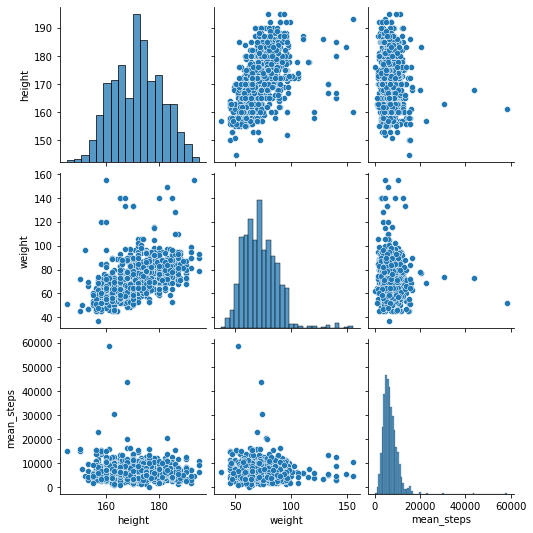

In [22]:
variables = df[["height", "weight", "mean_steps"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

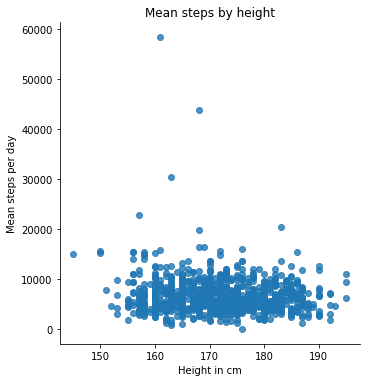

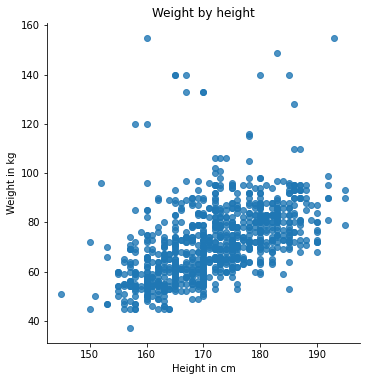

In [23]:

# Mean steps by height
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')
plt.title('Mean steps by height')
plt.show()

# Weight by height
sns.lmplot(x='height', y='weight', fit_reg=False, data=df)
plt.xlabel('Height in cm') 
plt.ylabel('Weight in kg')
plt.title('Weight by height')
plt.show()

# Now the correlations:

In [24]:
variables = variables.dropna() #I will drop the rows with NA, otherwise pearsonr won't work
print(pearsonr(variables['height'], variables['mean_steps']))
print(pearsonr(variables['height'], variables['weight']))

(-0.09035480719937927, 0.006153428450897668)
(0.5110669373491965, 3.1566905253554607e-62)


Both relations are linear. The points are around a straight line, with no clear curvature.
There is a neglible negative correlation between height and mean steps. This correlation is significant (p < 0.01).
There is a moderate positive correlation between height and weight. This correlation is significant (p < 0.001).

# Relation between a categorical and numerical variable

C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\BharatBhai\.conda\envs\pandas\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


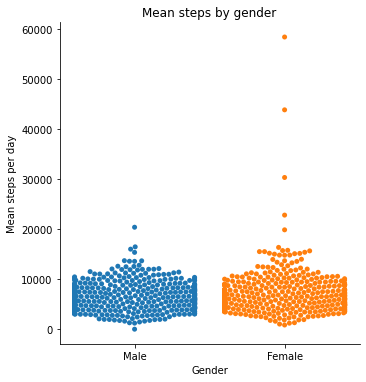

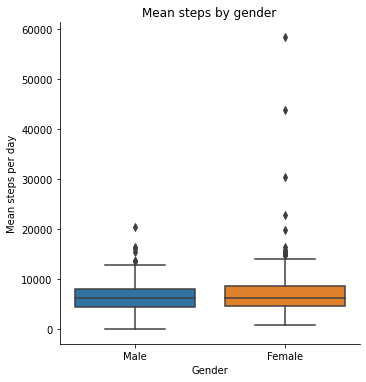

In [25]:
df_subset = df[["gender", "mean_steps"]].dropna() #select only the variables to plot to avoid warning because of NA's

sns.catplot(data = df_subset, x = "gender", y = "mean_steps", kind = "swarm") #swarm plot
plt.xlabel("Gender") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by gender")

sns.catplot(data = df_subset, x = "gender", y = "mean_steps", kind = "box") #box plot
plt.xlabel("Gender") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by gender")
plt.show()

# Relation between two categorical variables

Let's look at the relation between gender and education. We want to see how the education level differs for males and females. It's customary to put the independent variable in the columns. I've added margins=True to get the totals too.

In [26]:
pd.crosstab(df["education_1"], df["gender"], margins=True)

gender,Female,Male,All
education_1,,,
Bachelor,185,172,357
High school,63,43,106
Master or doctorate,159,253,412
No degree,0,1,1
Primary,7,6,13
Vocational,21,19,40
All,435,494,929


It seems the men in this sample are somewhat higher educated - they are overrepresented at the highest level ("Master or doctorate") and underrepresented at lower levels. However, it's hard to tell since there are more men overall. So let's make a proportional table. We normalize over the columns, so we need to add that as argument (normalize="columns")

In [27]:
pd.crosstab(df["education_1"], df["gender"], normalize="columns", margins=True) #normalize over columns

gender,Female,Male,All
education_1,,,
Bachelor,0.425287,0.348178,0.384284
High school,0.144828,0.087045,0.114101
Master or doctorate,0.365517,0.512146,0.443488
No degree,0.000000,0.002024,0.001076
Primary,0.016092,0.012146,0.013994
Vocational,0.048276,0.038462,0.043057


Indeed, men overrepresented at the master level and underrepresented at the bachelor and high school level. The others involve numbers too small to be an important difference. This is why it's important to always make both tables, absolute and proportional.

Finally, let's make a graph of the data

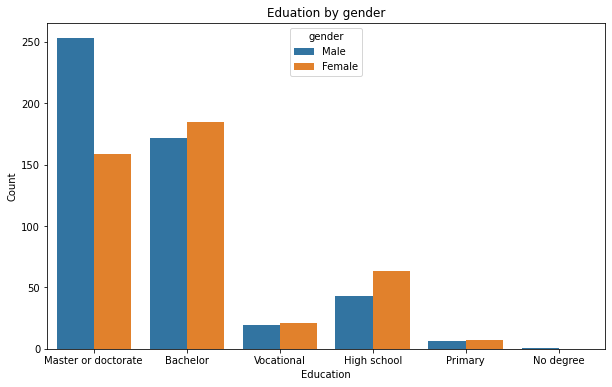

In [28]:
plt.figure(figsize=(10, 6)) #set the figure ("canvas") size
plot = sns.countplot(data = df, x = "education_1", hue = "gender") #create the plot
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Eduation by gender")
plt.show()